<a href="https://colab.research.google.com/github/SaiNivedh26/Code-alpha-internship/blob/main/Fraud_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd

In [51]:
df_train=pd.read_csv("/content/fraudTrain.csv")
df_test=pd.read_csv("/content/fraudTest.csv")

In [52]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [53]:
print(len(df_train),len(df_test))

50601 50558


In [54]:
df_tot=pd.concat([df_train,df_test])
df_tot

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50553,50553,2020-07-08 08:10:50,2229378226512508,fraud_Heidenreich PLC,grocery_pos,96.11,Thomas,Hale,M,949 Smith Parkway,...,43.4987,-90.2796,1360.0,Occupational hygienist,1984-11-06,aa1225ad8afc5caa95293810c1bc26ea,1.373271e+09,43.336487,-90.627841,0.0
50554,50554,2020-07-08 08:12:23,2475085306462014,fraud_Thiel PLC,misc_pos,33.09,John,Miller,M,153 Mccullough Springs Apt. 857,...,44.2378,-95.2739,1507.0,Land/geomatics surveyor,1993-10-12,70960163b42b35306c79be5c2a5b3975,1.373271e+09,45.039977,-95.974385,0.0
50555,50555,2020-07-08 08:12:57,372382441451095,fraud_Kutch LLC,gas_transport,58.23,Brent,Terrell,M,502 Rice Plaza Apt. 979,...,41.8948,-73.9767,2471.0,Heritage manager,1966-01-21,cf71ab1ed381db33506754f2570c7e8e,1.373271e+09,42.391510,-74.566349,0.0
50556,50556,2020-07-08 08:13:32,4128730454058057622,fraud_Luettgen PLC,gas_transport,57.43,Monique,Martin,F,68276 Matthew Springs,...,31.3833,-95.0619,43.0,"Engineer, production",1949-10-04,fcc57c53eb6920e5d3e0f2b93afaa594,1.373271e+09,30.545227,-94.265875,0.0


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_fraud'>

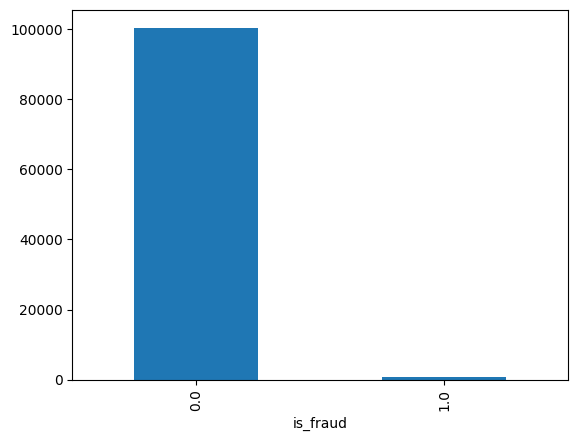

In [56]:
#df_tot.groupby('is_fraud').count().plot.bar() #for all features
df_tot.groupby('is_fraud').count()['cc_num'].plot.bar()

In [57]:
fraud=df_tot[df_tot['is_fraud']==1]
Legit=df_tot[df_tot['is_fraud']==0]
print(len(fraud),len(Legit))


662 100495


In [58]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101159 entries, 0 to 50557
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             101159 non-null  int64  
 1   trans_date_trans_time  101159 non-null  object 
 2   cc_num                 101159 non-null  int64  
 3   merchant               101159 non-null  object 
 4   category               101159 non-null  object 
 5   amt                    101159 non-null  float64
 6   first                  101159 non-null  object 
 7   last                   101159 non-null  object 
 8   gender                 101159 non-null  object 
 9   street                 101159 non-null  object 
 10  city                   101159 non-null  object 
 11  state                  101159 non-null  object 
 12  zip                    101159 non-null  int64  
 13  lat                    101159 non-null  float64
 14  long                   101158 non-null  fl

In [59]:
df_tot.nunique()

Unnamed: 0                50601
trans_date_trans_time     99572
cc_num                      915
merchant                    693
category                     14
amt                       20958
first                       340
last                        468
gender                        2
street                      915
city                        841
state                        50
zip                         904
lat                         902
long                        902
city_pop                    826
job                         477
dob                         901
trans_num                101158
unix_time                 99570
merch_lat                100852
merch_long               101019
is_fraud                      2
dtype: int64

In [60]:
df_tot.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

In [61]:
df_tot.duplicated().sum()

0

In [62]:
df = df_tot.dropna(subset=['job'])
df = df_tot.dropna(subset=['dob'])
df = df_tot.dropna(subset=['trans_num'])
df = df_tot.dropna(subset=['unix_time'])
df = df_tot.dropna(subset=['merch_lat'])
df = df_tot.dropna(subset=['merch_long'])
df = df_tot.dropna(subset=['is_fraud'])

In [63]:
df_tot.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

<Axes: >

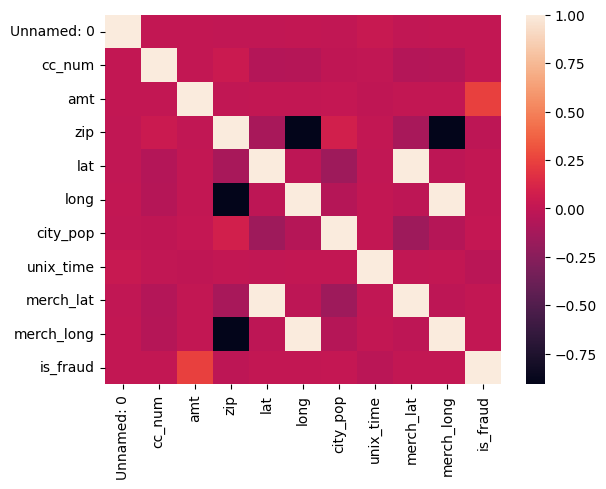

In [64]:
sns.heatmap(df_tot[[i for i in df_tot.columns\
                         if df_tot[i].dtype == 'int64' \
                            or df_tot[i].dtype == 'float64']]\
                            .corr())

In [65]:
df_bal = pd.concat([fraud,Legit.sample(n=len(fraud),random_state=42)])

In [66]:
df_bal.shape

(1324, 23)

<Axes: xlabel='is_fraud'>

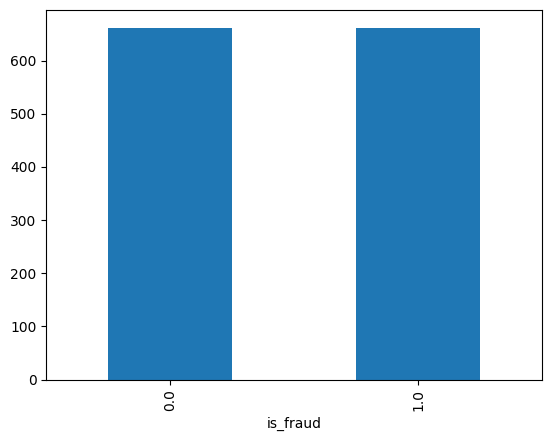

In [67]:
df_bal.groupby('is_fraud').count()['cc_num'].plot.bar()


In [68]:
# Dropping columns not relevant for this case
columns_dropped = ['Unnamed: 0',
                   'merchant',
                   'cc_num',
                   'first',
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

df_bal.drop(columns = columns_dropped, inplace = True)

In [69]:
df_bal.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,2019-01-02 01:06:37,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2472,2019-01-02 01:47:29,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2523,2019-01-02 03:05:23,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2546,2019-01-02 03:38:03,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2553,2019-01-02 03:55:47,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0


In [70]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 2449 to 4714
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1324 non-null   object 
 1   category               1324 non-null   object 
 2   amt                    1324 non-null   float64
 3   city                   1324 non-null   object 
 4   state                  1324 non-null   object 
 5   lat                    1324 non-null   float64
 6   long                   1324 non-null   float64
 7   city_pop               1324 non-null   float64
 8   dob                    1324 non-null   object 
 9   is_fraud               1324 non-null   float64
dtypes: float64(5), object(5)
memory usage: 146.1+ KB


In [71]:
df_bal['trans_date_trans_time']=pd.to_datetime(df_bal['trans_date_trans_time'])
df_bal['dob']=pd.to_datetime(df_bal['dob'])


In [72]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 2449 to 4714
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1324 non-null   datetime64[ns]
 1   category               1324 non-null   object        
 2   amt                    1324 non-null   float64       
 3   city                   1324 non-null   object        
 4   state                  1324 non-null   object        
 5   lat                    1324 non-null   float64       
 6   long                   1324 non-null   float64       
 7   city_pop               1324 non-null   float64       
 8   dob                    1324 non-null   datetime64[ns]
 9   is_fraud               1324 non-null   float64       
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 146.1+ KB


In [73]:
df_bal.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,2019-01-02 01:06:37,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2472,2019-01-02 01:47:29,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2523,2019-01-02 03:05:23,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2546,2019-01-02 03:38:03,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2553,2019-01-02 03:55:47,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0


In [74]:
df_bal['trans_date_trans_time']=df_bal['trans_date_trans_time'].dt.hour

In [79]:
df_bal = df_bal.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

In [80]:
df_bal.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,1,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2472,1,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2523,3,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2546,3,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2553,3,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0


In [81]:
def tod(hour):
  if 4 <hour['hour_transaction']<=12 :
    ans='morning'
  elif 12 <hour['hour_transaction']<=20 :
    ans='afternoon'
  else:
    ans='night'

  return ans

In [82]:
df_bal['hour_transaction'] = df_bal.apply(tod, axis = 1)


In [83]:
df_bal

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,1988-09-15,1.0
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,1960-10-28,1.0
...,...,...,...,...,...,...,...,...,...,...
1348,afternoon,kids_pets,21.86,Falconer,NY,42.1239,-79.1895,3833.0,1970-10-09,0.0
29152,morning,gas_transport,68.07,Glade Spring,VA,36.7779,-81.7676,5657.0,1987-04-29,0.0
21183,afternoon,home,74.46,Mc Nabb,IL,41.1730,-89.2187,532.0,1956-01-09,0.0
1574,afternoon,home,36.53,Smackover,AR,33.3398,-92.7442,2501.0,1986-06-11,0.0


In [84]:
df_bal['dob']=df_bal['dob'].dt.year
df_bal = df_bal.rename(columns= {'dob':'age'})

In [85]:
df_bal

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,1988,1.0
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,1960,1.0
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,1960,1.0
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,1988,1.0
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,1960,1.0
...,...,...,...,...,...,...,...,...,...,...
1348,afternoon,kids_pets,21.86,Falconer,NY,42.1239,-79.1895,3833.0,1970,0.0
29152,morning,gas_transport,68.07,Glade Spring,VA,36.7779,-81.7676,5657.0,1987,0.0
21183,afternoon,home,74.46,Mc Nabb,IL,41.1730,-89.2187,532.0,1956,0.0
1574,afternoon,home,36.53,Smackover,AR,33.3398,-92.7442,2501.0,1986,0.0


In [86]:
from datetime import datetime
df_bal['age']=datetime.now().year - df_bal['age']


In [87]:
df_bal

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885.0,36,1.0
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797.0,64,1.0
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797.0,64,1.0
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885.0,36,1.0
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797.0,64,1.0
...,...,...,...,...,...,...,...,...,...,...
1348,afternoon,kids_pets,21.86,Falconer,NY,42.1239,-79.1895,3833.0,54,0.0
29152,morning,gas_transport,68.07,Glade Spring,VA,36.7779,-81.7676,5657.0,37,0.0
21183,afternoon,home,74.46,Mc Nabb,IL,41.1730,-89.2187,532.0,68,0.0
1574,afternoon,home,36.53,Smackover,AR,33.3398,-92.7442,2501.0,38,0.0


In [88]:
df_bal[df_bal['is_fraud']==1].groupby('age').count()['is_fraud']

age
23    13
24    10
25    11
27    33
28    16
30    23
31    12
32    10
34    11
35     3
36    22
37    35
38    39
40    23
41     7
42    16
43     6
48    14
49     2
50    11
51    16
52    14
53    30
54    11
55     9
57    10
60     9
61    10
62     7
64    28
65    20
66     3
67    10
68    15
69    19
70     5
72    12
74    11
75     4
78    11
79    10
80     8
83    12
84    15
85    35
89    11
Name: is_fraud, dtype: int64

In [89]:
df_bal[df_bal['is_fraud']==0].groupby('age').count()['is_fraud']

age
19     1
20     4
21     3
23     1
24     3
      ..
95     2
96     1
97     1
98     2
100    3
Name: is_fraud, Length: 77, dtype: int64

In [90]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 2449 to 4714
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_transaction  1324 non-null   object 
 1   category          1324 non-null   object 
 2   amt               1324 non-null   float64
 3   city              1324 non-null   object 
 4   state             1324 non-null   object 
 5   lat               1324 non-null   float64
 6   long              1324 non-null   float64
 7   city_pop          1324 non-null   float64
 8   age               1324 non-null   int32  
 9   is_fraud          1324 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 140.9+ KB


In [91]:
NUMERICAL_FEATURES = [i for i in df_bal.columns if df_bal[i].dtype == 'int64'\
                      or df_bal[i].dtype =='int32' \
                      or df_bal[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_bal.columns if df_bal[i].dtype == 'object']

In [92]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [93]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [95]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_bal[CATEGORICAL_FEATURES])
df_bal[CATEGORICAL_FEATURES]=encoder.transform(df_bal[CATEGORICAL_FEATURES])

In [96]:
df_bal.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,77.0,26.0,35.9946,-81.7266,885.0,36,1.0
2472,2.0,2.0,11.52,375.0,41.0,29.4400,-98.4590,1595797.0,64,1.0
2523,2.0,4.0,276.31,375.0,41.0,29.4400,-98.4590,1595797.0,64,1.0
2546,2.0,2.0,7.03,77.0,26.0,35.9946,-81.7266,885.0,36,1.0
2553,2.0,4.0,275.73,375.0,41.0,29.4400,-98.4590,1595797.0,64,1.0


In [97]:
df_bal[['is_fraud','age']] = df_bal[['is_fraud','age']].astype('float64')

In [98]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 2449 to 4714
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_transaction  1324 non-null   float64
 1   category          1324 non-null   float64
 2   amt               1324 non-null   float64
 3   city              1324 non-null   float64
 4   state             1324 non-null   float64
 5   lat               1324 non-null   float64
 6   long              1324 non-null   float64
 7   city_pop          1324 non-null   float64
 8   age               1324 non-null   float64
 9   is_fraud          1324 non-null   float64
dtypes: float64(10)
memory usage: 146.1 KB


<Axes: >

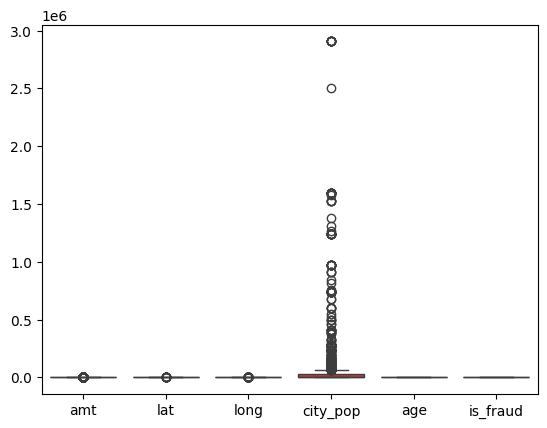

In [100]:
sns.boxplot(df_bal[NUMERICAL_FEATURES])


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled=scaler.fit_transform(df_bal[NUMERICAL_FEATURES])
df_scaled=pd.DataFrame(df_scaled)

In [103]:
df_scaled.head()

,0,1,2,3,4,5
0,0.189187,0.356987,0.859026,0.000297,0.209877,1.0
1,0.007100,0.210445,0.687801,0.549003,0.555556,1.0
2,0.185978,0.210445,0.687801,0.549003,0.555556,1.0
3,0.004067,0.356987,0.859026,0.000297,0.209877,1.0
4,0.185587,0.210445,0.687801,0.549003,0.555556,1.0


In [107]:
last_column = df_scaled.shape[1]-1
last_column

5

In [108]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 662
Fraud: 662


In [109]:
df_scaled.rename(columns={last_column:'is_fraud'},inplace=True)
df_scaled.head()

,0,1,2,3,4,is_fraud
0,0.189187,0.356987,0.859026,0.000297,0.209877,1.0
1,0.007100,0.210445,0.687801,0.549003,0.555556,1.0
2,0.185978,0.210445,0.687801,0.549003,0.555556,1.0
3,0.004067,0.356987,0.859026,0.000297,0.209877,1.0
4,0.185587,0.210445,0.687801,0.549003,0.555556,1.0


In [110]:
from xgboost import XGBClassifier

In [111]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split

In [112]:
X = df_scaled.drop(columns='is_fraud')
Y = df_scaled['is_fraud']

In [117]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [118]:
xgb = XGBClassifier(objective='binary:logistic')

In [119]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
x_test

,0,1,2,3,4
888,0.021867,0.571826,0.731802,0.005553,0.222222
756,0.004540,0.404889,0.860360,0.000209,0.567901
1164,0.011464,0.614157,0.446794,0.017362,0.259259
554,0.535074,0.470447,0.860845,0.093616,0.506173
1055,0.249223,0.277078,0.824714,0.020546,0.259259
...,...,...,...,...,...
549,0.599583,0.407427,0.817878,0.253300,0.654321
1117,0.018415,0.456827,0.886828,0.000309,0.407407
869,0.043080,0.242720,0.832440,0.001172,0.679012
1270,0.089801,0.470984,0.866026,0.000902,0.271605


In [123]:
x_train

,0,1,2,3,4
170,0.482253,0.500348,0.936529,0.000087,0.419753
714,0.047586,0.434428,0.606692,0.000087,0.246914
622,0.231537,0.265980,0.618718,0.000191,0.740741
209,0.011700,0.437153,0.800339,0.000063,0.555556
374,0.005148,0.166408,0.861475,0.017481,0.234568
...,...,...,...,...,...
1095,0.001770,0.446789,0.866767,0.000036,0.728395
1130,0.052375,0.432898,0.785008,0.000519,0.308642
1294,0.000115,0.495201,0.877292,0.000858,0.728395
860,0.001750,0.358870,0.864638,0.001194,0.209877


In [126]:
def predict(model, test_set, threshold):
    predictions = model.predict(test_set)
    pred_threshold = model.predict_proba(test_set)
    test_set["prediction"] = predictions
    test_set["pred_threshold"] = (pred_threshold >= threshold)[:, 1].astype(float)
    return test_set

In [127]:
predict(xgb,x_test,0.3)

,0,1,2,3,4,prediction,pred_threshold
888,0.021867,0.571826,0.731802,0.005553,0.222222,0,0.0
756,0.004540,0.404889,0.860360,0.000209,0.567901,0,0.0
1164,0.011464,0.614157,0.446794,0.017362,0.259259,1,1.0
554,0.535074,0.470447,0.860845,0.093616,0.506173,1,1.0
1055,0.249223,0.277078,0.824714,0.020546,0.259259,1,1.0
...,...,...,...,...,...,...,...
549,0.599583,0.407427,0.817878,0.253300,0.654321,1,1.0
1117,0.018415,0.456827,0.886828,0.000309,0.407407,0,0.0
869,0.043080,0.242720,0.832440,0.001172,0.679012,0,0.0
1270,0.089801,0.470984,0.866026,0.000902,0.271605,0,0.0


In [130]:
y_test = pd.DataFrame(y_test)

In [131]:
x_test['real']=y_test['is_fraud']

In [132]:
x_test

,0,1,2,3,4,prediction,pred_threshold,real
888,0.021867,0.571826,0.731802,0.005553,0.222222,0,0.0,0.0
756,0.004540,0.404889,0.860360,0.000209,0.567901,0,0.0,0.0
1164,0.011464,0.614157,0.446794,0.017362,0.259259,1,1.0,0.0
554,0.535074,0.470447,0.860845,0.093616,0.506173,1,1.0,1.0
1055,0.249223,0.277078,0.824714,0.020546,0.259259,1,1.0,0.0
...,...,...,...,...,...,...,...,...
549,0.599583,0.407427,0.817878,0.253300,0.654321,1,1.0,1.0
1117,0.018415,0.456827,0.886828,0.000309,0.407407,0,0.0,0.0
869,0.043080,0.242720,0.832440,0.001172,0.679012,0,0.0,0.0
1270,0.089801,0.470984,0.866026,0.000902,0.271605,0,0.0,0.0


In [133]:
print(classification_report(x_test['real'], x_test['prediction']))
print(classification_report(x_test['real'], x_test['pred_threshold']))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       136
         1.0       0.92      0.93      0.92       129

    accuracy                           0.92       265
   macro avg       0.92      0.92      0.92       265
weighted avg       0.92      0.92      0.92       265

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       136
         1.0       0.89      0.95      0.92       129

    accuracy                           0.92       265
   macro avg       0.92      0.92      0.92       265
weighted avg       0.92      0.92      0.92       265



In [135]:
def confusion_matrix_plot(test_set, pred_label, model):
    cm = confusion_matrix(x_test['real'], x_test[pred_label], labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    plt.show()

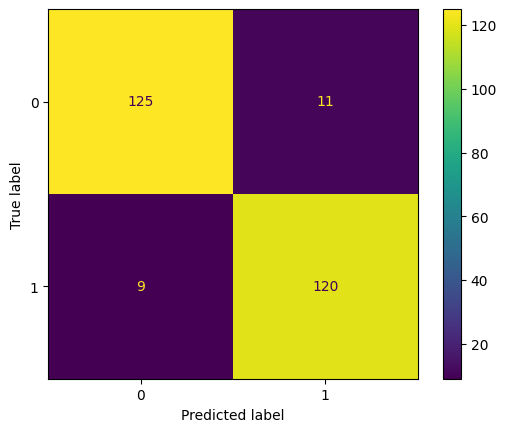

In [136]:
confusion_matrix_plot(x_test,'prediction',xgb)